In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('orders/orders.csv')

In [2]:
product=pd.read_csv('products/products.csv')
product=product.head(n=49688//4)

In [3]:
final= pd.merge(df, product, on="product_id")
final

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
1,68474,11109,8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,78197,11109,3,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
3,120619,11109,1,0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
4,128666,11109,12,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
...,...,...,...,...,...,...,...
309672,3417904,6791,13,0,Low Fat Blueberry Goat Milk Yogurt,120,16
309673,3418564,9073,29,0,Fire Roasted Whole Red Peppers,81,15
309674,3419375,8360,12,0,Traditional Unseasoned Bread Crumbs,5,13
309675,3420011,1528,12,0,Sprinkles Decors,97,13


In [4]:
orders=final.values.tolist()
orders

[[1, 11109, 2, 1, 'Organic 4% Milk Fat Whole Milk Cottage Cheese', 108, 16],
 [68474,
  11109,
  8,
  1,
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  108,
  16],
 [78197,
  11109,
  3,
  1,
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  108,
  16],
 [120619,
  11109,
  1,
  0,
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  108,
  16],
 [128666,
  11109,
  12,
  1,
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  108,
  16],
 [153973,
  11109,
  10,
  0,
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  108,
  16],
 [193761,
  11109,
  2,
  0,
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  108,
  16],
 [213799,
  11109,
  6,
  1,
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  108,
  16],
 [214201,
  11109,
  3,
  1,
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  108,
  16],
 [228214,
  11109,
  1,
  1,
  'Organic 4% Milk Fat Whole Milk Cottage Cheese',
  108,
  16],
 [245323,
  11109,
  2,
  1,
  'Organic 4% Milk Fat Whole Milk Cottage Cheese

In [5]:
transactions={}
for i in range(len(orders)):
    x=orders[i][0]
    if x in transactions:
        transactions[x].append(orders[i][4])
    else:
        transactions[x]=[orders[i][4]]
transactions

{1: ['Organic 4% Milk Fat Whole Milk Cottage Cheese', 'Organic Celery Hearts'],
 68474: ['Organic 4% Milk Fat Whole Milk Cottage Cheese',
  'Whole Milk Plain Yogurt',
  'Organic Chicken & Apple Sausage',
  'Organic Cream Cheese Bar',
  'Yellow Onions',
  'Organic Chicken Broth',
  'Boneless Skinless Chicken Thighs'],
 78197: ['Organic 4% Milk Fat Whole Milk Cottage Cheese',
  'Spinach Pizza',
  'Pizza 4 Cheese',
  '100% Recycled Paper Towels',
  'Vegetable Pot Pie'],
 120619: ['Organic 4% Milk Fat Whole Milk Cottage Cheese',
  'Large Alfresco Eggs'],
 128666: ['Organic 4% Milk Fat Whole Milk Cottage Cheese',
  'Breakfast Scramble Wrap'],
 153973: ['Organic 4% Milk Fat Whole Milk Cottage Cheese'],
 193761: ['Organic 4% Milk Fat Whole Milk Cottage Cheese',
  'Large Alfresco Eggs'],
 213799: ['Organic 4% Milk Fat Whole Milk Cottage Cheese',
  'English Seedless Cucumber',
  'White Onion',
  'Organic Chicken Stock'],
 214201: ['Organic 4% Milk Fat Whole Milk Cottage Cheese',
  'Gluten Free 

In [6]:
text=[]
for i in transactions:
    if len(transactions[i])!=1:
        text.append(";".join(transactions[i]))

In [7]:
text = "|".join(text)

In [8]:
def replace(text):
    if ' ' in text: 
        text = text.replace(' ' , '_')
        text = text.replace('-','_')
        text = text.replace(',','_')
    return text
t=replace(text)

In [9]:
len(transactions)

105897

In [10]:
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np

In [12]:
import pickle
tokenizer = Tokenizer(filters=';|',lower=True)

tokenizer.fit_on_texts([t])
vocabulary_size = len(tokenizer.word_index) + 1
print('Unique items: %d' % vocabulary_size)
sequences = list()
for line in text.split('|'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    encoded=encoded[:5]
    sequences.append(encoded)
print('Total Sequences: %d' % len(sequences))
pickle.dump(tokenizer, open("token.pickle", "wb"))

Unique items: 9518
Total Sequences: 74268


In [13]:
tokenizer.word_index

{'seedless_red_grapes': 1,
 'organic_red_onion': 2,
 'yellow_onions': 3,
 'organic_lemon': 4,
 'small_hass_avocado': 5,
 'broccoli_crown': 6,
 'organic_red_bell_pepper': 7,
 '100%_whole_wheat_bread': 8,
 'blueberries': 9,
 'apple_honeycrisp_organic': 10,
 'hass_avocados': 11,
 'organic_navel_orange': 12,
 'large_alfresco_eggs': 13,
 'organic_broccoli': 14,
 'organic_reduced_fat_2%_milk': 15,
 'red_raspberries': 16,
 'green_onions': 17,
 'russet_potato': 18,
 'organic_sticks_low_moisture_part_skim_mozzarella_string_cheese': 19,
 'shredded_parmesan': 20,
 'granny_smith_apples': 21,
 'whole_milk': 22,
 'cantaloupe': 23,
 'vanilla_almond_breeze_almond_milk': 24,
 '100%_raw_coconut_water': 25,
 'yellow_bell_pepper': 26,
 'baby_spinach': 27,
 '100%_recycled_paper_towels': 28,
 'organic_celery_hearts': 29,
 'italian_sparkling_mineral_water': 30,
 'clementines': 31,
 'boneless_skinless_chicken_breast': 32,
 'soda': 33,
 'organic_2%_reduced_fat_milk': 34,
 'white_onion': 35,
 'organic_milk': 36

In [14]:
max_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print('Max Sequence Length: %d' % max_len)
sequences = np.array(sequences)

Max Sequence Length: 5


In [15]:
X, y = sequences[:, :-1], sequences[:, -1]

In [16]:
print(X.shape, y.shape)

(74268, 4) (74268,)


In [17]:
y = to_categorical(y, num_classes=vocabulary_size)

In [18]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X[:131209//2], y[:131209//2], test_size=0.2)

In [25]:
from keras import Sequential
from keras.layers import Embedding, Dropout, LSTM, Dense,GRU,LeakyReLU,GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Embedding(vocabulary_size, 4, input_length=max_len - 1))
model.add(GRU(16))
model.add(Dropout(0.2))
model.add(Dense(40))
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(vocabulary_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Epoch 1/5000
1857/1857 [==============================] - 28s 14ms/step - loss: 2.9349 - acc: 0.3828 - val_loss: 2.3916 - val_acc: 0.5061
Epoch 2/5000
1857/1857 [==============================] - 25s 13ms/step - loss: 2.5508 - acc: 0.4436 - val_loss: 2.3274 - val_acc: 0.5480
Epoch 3/5000
1857/1857 [==============================] - 27s 15ms/step - loss: 2.4981 - acc: 0.4507 - val_loss: 2.3124 - val_acc: 0.5479
Epoch 4/5000
1857/1857 [==============================] - 29s 15ms/step - loss: 2.4811 - acc: 0.4506 - val_loss: 2.3184 - val_acc: 0.5479
Epoch 5/5000
1857/1857 [==============================] - 27s 15ms/step - loss: 2.4755 - acc: 0.4509 - val_loss: 2.3050 - val_acc: 0.5516
Epoch 6/5000
1857/1857 [==============================] - 27s 14ms/step - loss: 2.4674 - acc: 0.4517 - val_loss: 2.2968 - val_acc: 0.5509
Epoch 7/5000
1857/1857 [==============================] - 26s 14ms/step - loss: 2.4648 - acc: 0.4517 - val_loss: 2.2846 - val_acc: 0.5512
Epoch 8/5000
1857/1857 [==========

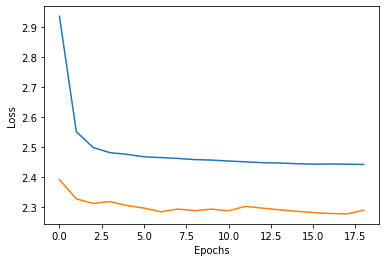

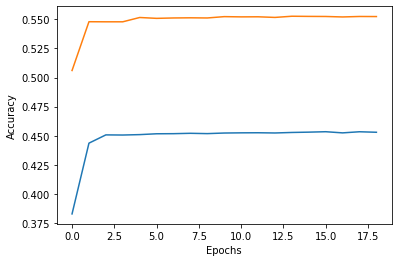

In [26]:
# h = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=2, verbose=1, epochs=5000)
from keras.callbacks import EarlyStopping 
es_callback = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)
h = model.fit(X, y, validation_split=0.2, verbose=1, epochs=5000, callbacks=[es_callback])
import matplotlib.pyplot as plt

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(h.history['acc'], label='Train accuracy')
plt.plot(h.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
model.save("")

In [ ]:
tokenizer.word_index.items()